## Let's look at boundary and label monotonicity in Hierarchical labels: SALAMI.


In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Let's get the directory of jams files:
import os, jams, mir_eval, bnl, json, tqdm
import numpy as np
import xarray as xr
from tqdm import tqdm


## Experiement: check salami reference boundary monotonicity

In [13]:
# Let's do it on all files to see reference has monotonic boundaries.
for tid in tqdm(bnl.utils.get_salami_tids()):
    hiers = bnl.fio.get_ref_hiers(tid)
    for anno_id, h in enumerate(hiers):
        if not h.has_mono_B():
            print(f'{tid} annotator {anno_id} has non-monotonic boundaries!')

## Everything has monotonic boundaries!

100%|██████████| 1359/1359 [00:13<00:00, 102.44it/s]


## Experiment: How monoboundary forcing change T measure on Adobe outputs against all annotations scatter plots

In [5]:
from pqdm.processes import pqdm
from meet_mats import save_tmeasure
import bnl, os
results = pqdm(bnl.utils.get_salami_tids(), save_tmeasure, n_jobs=os.cpu_count())

QUEUEING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1359 [00:00<?, ?it/s]

In [8]:
len(results)

1359

In [14]:
results = save_tmeasure(10)
print(results)

{'orig_r': (0.25584578916195255, 0.35163441795203737, 0.29618803741719807), 'orig_f': (0.5513463387304033, 0.38203909737373204, 0.4513373563402699), 'tmeasure1_r': (0.2275783549160091, 0.3461351133241009, 0.27460697379339655), 'tmeasure0_r': (0.25584578916195255, 0.35163441795203737, 0.29618803741719807), 'tmeasure1_f': (0.5522161664460671, 0.3742096293437834, 0.44611151352331907), 'tmeasure0_f': (0.5513463387304033, 0.38203909737373204, 0.4513373563402699)}


## Experiment: CHange the depth of the hierarchy and how that affects the T measure?

(<Figure size 800x400 with 12 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: xlabel='Time'>], dtype=object))

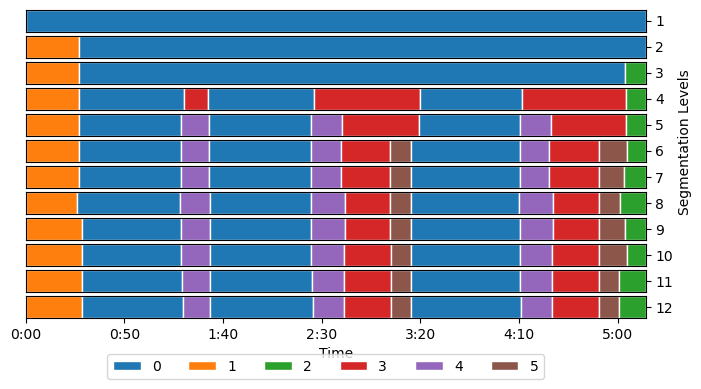

In [22]:
tid = 10
h = bnl.fio.get_adobe_hiers(tid)
h.plot()

(<Figure size 800x400 with 12 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: xlabel='Time'>], dtype=object))

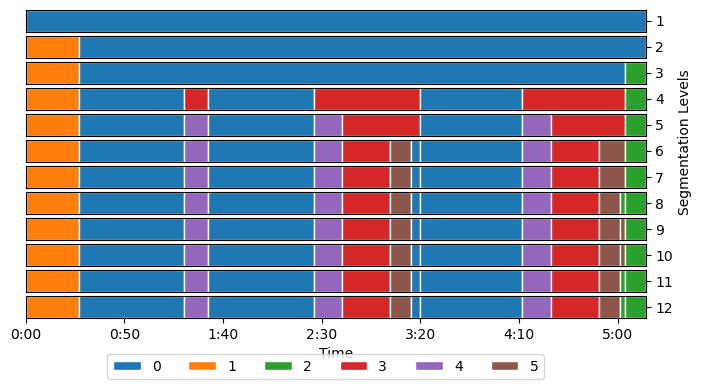

In [25]:
h_monob = h.force_mono_B(min_seg_dur=2)
h_monob.plot()

(<Figure size 800x400 with 7 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: xlabel='Time'>], dtype=object))

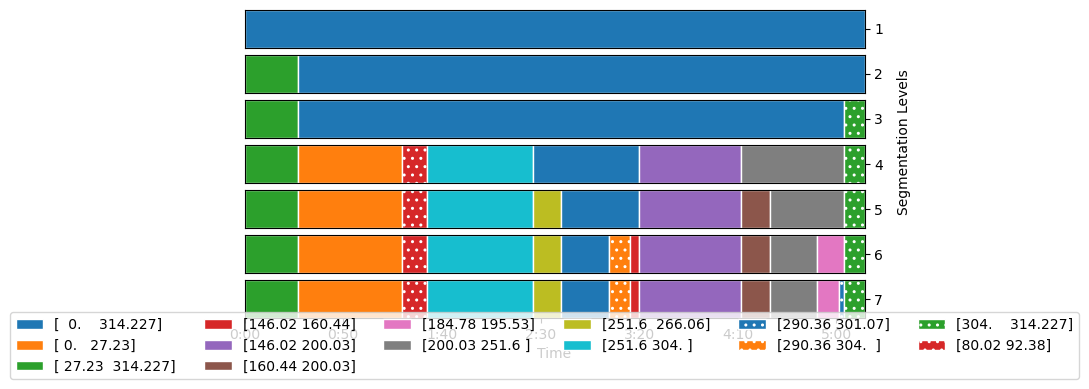

In [29]:
h_monob_pruned = h_monob.prune_identical_levels(boundary_only=True)
h_monob_pruned.plot()

(<Figure size 800x400 with 9 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: xlabel='Time'>], dtype=object))

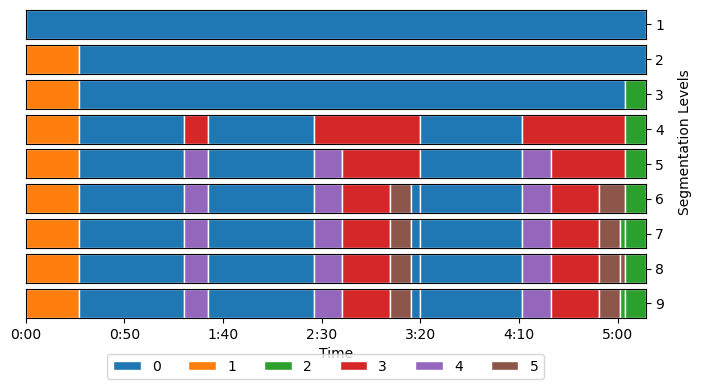

In [30]:
h_monob_pruned = h_monob.prune_identical_levels(boundary_only=False)
h_monob_pruned.plot()